In [1]:
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Datasets/Life Expectancy Data.csv')
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
num_cols = data.select_dtypes(include=('number')).columns
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Cleaning data
clean_data = data.copy()
clean_data[num_cols] = clean_data[num_cols].replace('?', pd.NA).apply(pd.to_numeric)
clean_data.replace(-1, pd.NA, inplace=True)
clean_data.fillna(clean_data.mean(numeric_only=True), inplace=True)

In [7]:
# Removing Outliers
for col in num_cols:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    clean_data[col] = clean_data[col].astype(float)
    median = clean_data[col].median()
    clean_data.loc[(clean_data[col] < low) | (clean_data[col] > high), col] = median
clean_data[num_cols] = clean_data[num_cols].fillna(clean_data[num_cols].mean())


In [8]:
clean_data.columns = clean_data.columns.str.strip()

In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

In [10]:
def one_hot_encode(df, col):
    df_encoded = df.copy()
    df_encoded = pd.get_dummies(df, columns=col, prefix=col, dtype=int)
    return df_encoded

In [11]:
def ordinal_encode(df, col_order_map):
    df_encoded = df.copy()
    for col, order in col_order_map.items():
        mapping = {c:i for i,c in enumerate(order)}
        df_encoded[col] = df_encoded[col].map(mapping)
    return df_encoded

In [12]:
def zscore_normalize_features(x):
    mean = np.mean(x, axis=0)
    std = np.std(x,axis=0)
    safe_std = np.where(std == 0, 1, std)
    x_norm = (x - mean)/safe_std
    return x_norm

In [13]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    y_prediction = np.dot(x, w) + b
    se = (y_prediction - y)**2
    cost = (1/(2*m))*(np.sum(se))
    return cost

In [14]:
def compute_gradient(x, y, w, b):
    m,n = x.shape
    y_prediction = np.dot(x, w) + b
    error = (y_prediction - y)
    dw = (1/m)*np.dot(x.transpose(), error)
    db = (1/m)*np.sum(error)
    return dw, db

In [15]:
def gradient_descent(x, y, w_i, b_i, learning_rate, epsilon=1e-6, max_iter=10000):
    i = 0
    w = copy.deepcopy(w_i)
    b = b_i
    prev_cost = float('inf')
    while True:
        dw, db = compute_gradient(x, y, w, b) 
        gradient_norm = math.sqrt(np.sum(dw**2) + db**2)
        cost = compute_cost(x, y, w, b)
        if (gradient_norm < epsilon ) or (abs(prev_cost - cost) < epsilon):
            break;
        if i > max_iter:
            break;
        w -= learning_rate*dw
        b -= learning_rate*db
        if i % 100 == 0:
            print(f'Iteration {i}: Cost = {cost}')
        prev_cost = cost
        i += 1
    return w, b


In [16]:
def predict(x, w, b):
    prediction = np.dot(x, w) + b
    return prediction

In [17]:
encoded_data = one_hot_encode(clean_data, col=['Country'])
encode_col = ['Status']
col_order_map = {}
for col in encode_col:
    col_order_map[col] = clean_data[col].unique()
encoded_data = ordinal_encode(encoded_data, col_order_map)
encoded_data.head(1)


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015.0,0,65.0,263.0,3.0,0.01,71.279624,65.0,17.0,19.1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x= encoded_data.drop(columns=['Life expectancy'])
y = encoded_data['Life expectancy'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_features = x.columns
x_train_norm = zscore_normalize_features(x_train)
x_test_norm = zscore_normalize_features(x_test)

In [19]:
w_i = np.zeros(len(x_features))
b_i = 0
learning_rate = 0.1
w, b = gradient_descent(x_train_norm, y_train, w_i, b_i, learning_rate)
final_cost = compute_cost(x_train_norm, y_train, w, b)
print(final_cost)
print(w, b)

Iteration 0: Cost = 2458.767260139869
Iteration 100: Cost = 3.23676723072962
Iteration 200: Cost = 3.096804896814335
Iteration 300: Cost = 3.0389906961720077
Iteration 400: Cost = 3.0100095584819466
Iteration 500: Cost = 2.9934638225193635
Iteration 600: Cost = 2.983028247799177
Iteration 700: Cost = 2.9759981834782003
Iteration 800: Cost = 2.9710762091488108
Iteration 900: Cost = 2.9675574327278587
Iteration 1000: Cost = 2.9650143413418797
Iteration 1100: Cost = 2.9631661965027036
Iteration 1200: Cost = 2.961819332575909
Iteration 1300: Cost = 2.9608364029438907
Iteration 1400: Cost = 2.9601185610732585
Iteration 1500: Cost = 2.9595941276497686
Iteration 1600: Cost = 2.9592109232518893
Iteration 1700: Cost = 2.958930889421297
Iteration 1800: Cost = 2.958726239837056
Iteration 1900: Cost = 2.9585766777004823
2.9584885694489573
[ 1.42966711  2.26222229  0.04753041  0.54132613 -0.30758638  0.14505106
 -0.07207101 -0.07216035 -0.06697075 -0.60897038  0.22636364  0.10915562
 -0.02211785  0

In [23]:
prediction = predict(x_test_norm, w, b)
print('Predicted life expectancy:', prediction)
print('Recorded data:\n', y_test)

Predicted life expectancy: [71.5026704  75.69950365 73.02252625 76.44207483 60.47059689 55.56763924
 67.72967517 73.83598737 77.41184502 52.78273417 51.19392141 58.84817737
 58.87379025 72.97861957 70.18340823 63.1253234  61.74001941 80.72184705
 69.4791725  78.28906808 78.91424489 83.81297365 73.29847375 66.48990749
 71.61667295 70.59931092 60.73571729 66.17484953 82.30179477 74.86340638
 67.2027884  74.43946317 74.09761544 72.99783987 78.53678894 56.83065158
 62.89966537 69.48617784 65.14507682 72.02224274 53.85668782 59.16923958
 76.19897235 84.51040055 78.19868663 44.23876196 80.14219877 72.97570058
 60.01828387 70.93403005 54.01377291 72.63531827 79.24659669 77.25849087
 77.86003076 61.50586594 74.26058844 74.05935692 63.59623503 70.42510738
 78.9764871  53.8836007  73.01142772 70.32412115 56.31903544 58.64070508
 52.68221789 77.43163989 60.88787542 72.07226722 77.15790021 77.15304206
 73.25409966 49.4459857  61.0073704  69.21864271 65.81037665 75.98826833
 62.00413444 69.61920937

In [21]:
y_mean = y_test.mean()
ss_reg = np.sum((predict(x_test_norm, w, b) - y_mean)**2)
ss_total = np.sum((y_test - y_mean)**2)
R2 = (ss_reg/ss_total)
print('R^2 score: ', R2)

R^2 score:  0.9252607236763086


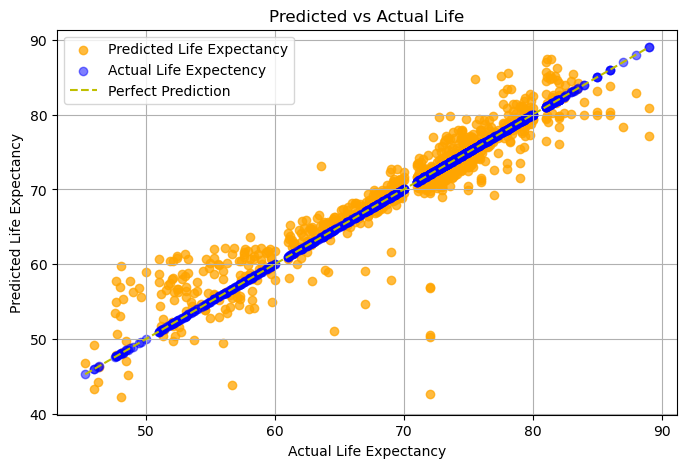

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, prediction, color='orange', alpha=0.75, label='Predicted Life Expectancy')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'y--', label='Perfect Prediction')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predicted vs Actual Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()